In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [2]:
pip install -U scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("/Users/vidit/Desktop/Customer Segmentation Project/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


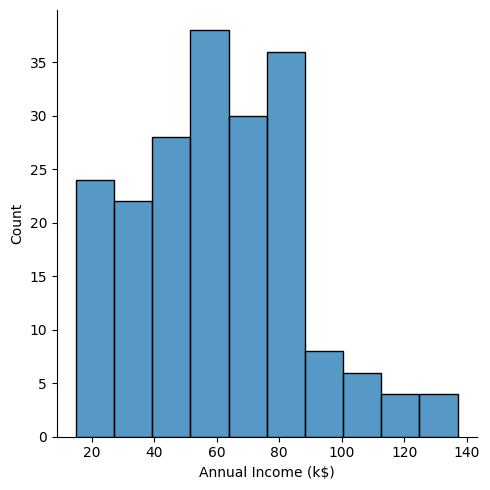

In [6]:
sns.displot(df['Annual Income (k$)']);

In [7]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

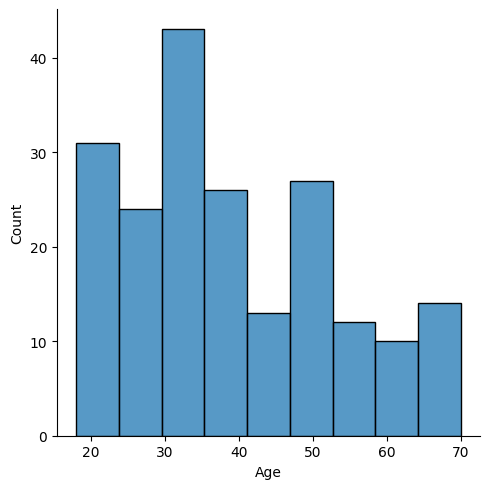

<Figure size 640x480 with 0 Axes>

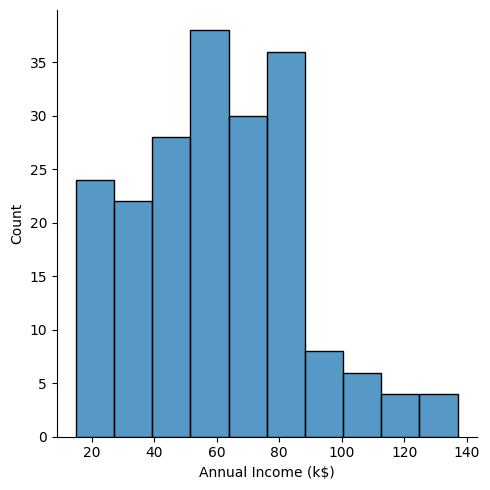

<Figure size 640x480 with 0 Axes>

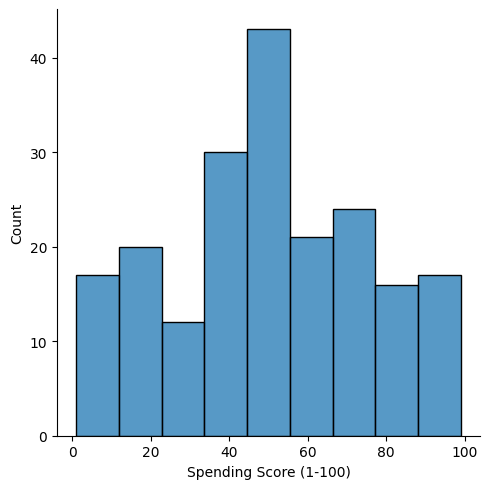

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i]);

In [11]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

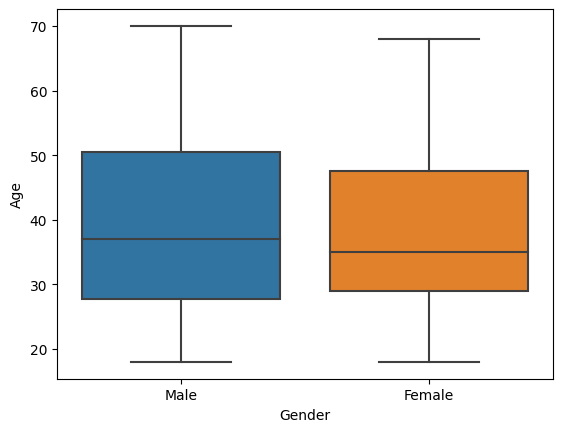

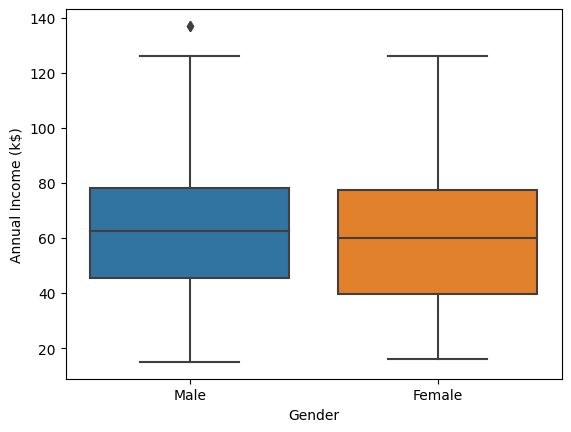

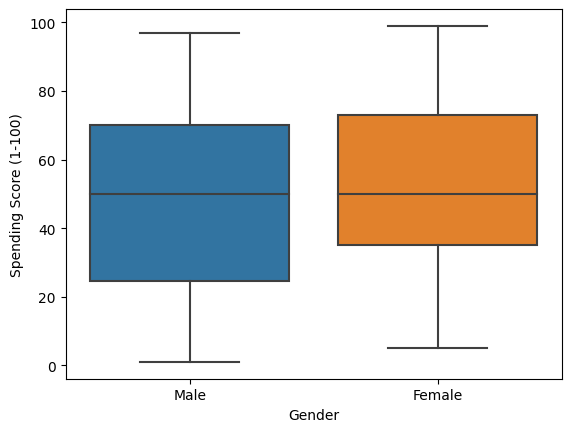

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y=df[i])

In [13]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Data


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

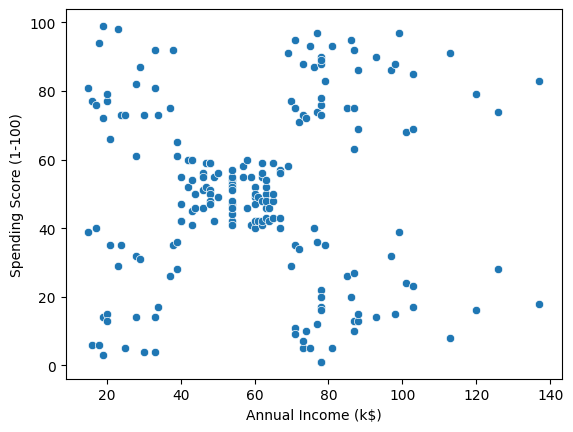

In [14]:
sns.scatterplot(data=df, x= 'Annual Income (k$)', y = 'Spending Score (1-100)')

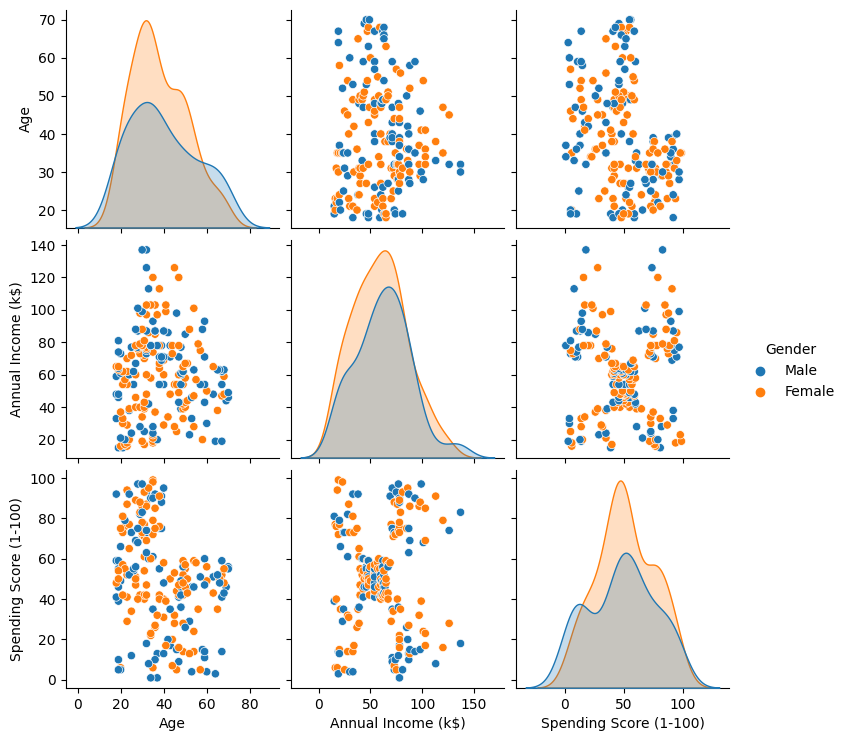

In [16]:
#df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender')

In [17]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# Clustering - Univariate, Bivariate, Multivariate

In [45]:
clustering1 = KMeans(n_clusters = 3)

In [46]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [59]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [60]:
df['Income cluster'] = clustering1.labels_

In [61]:
df['Income cluster'].value_counts()

Income cluster
1    90
0    74
2    36
Name: count, dtype: int64

In [62]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [63]:
clustering1.inertia_

23517.330930930933

In [64]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [65]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13308.108021390373,
 8481.496190476191,
 5081.484660267269,
 3955.256654456655,
 2822.4996947496948,
 2168.4787157287155,
 1758.812049062049]

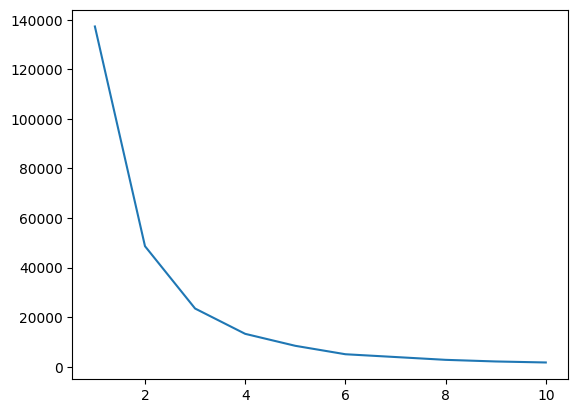

In [66]:
plt.plot(range(1,11),inertia_scores)

In [77]:
df.groupby('Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [56]:
df.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster'],
      dtype='object')

In [83]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


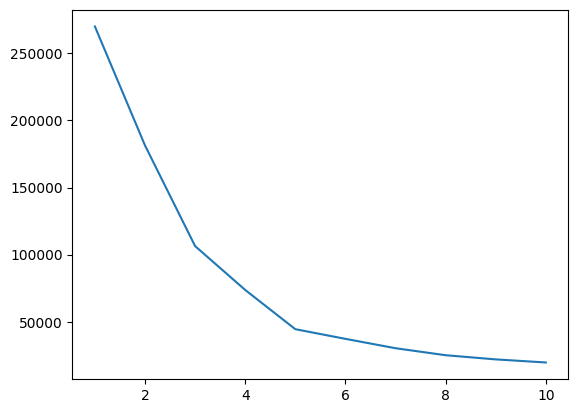

In [84]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [91]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

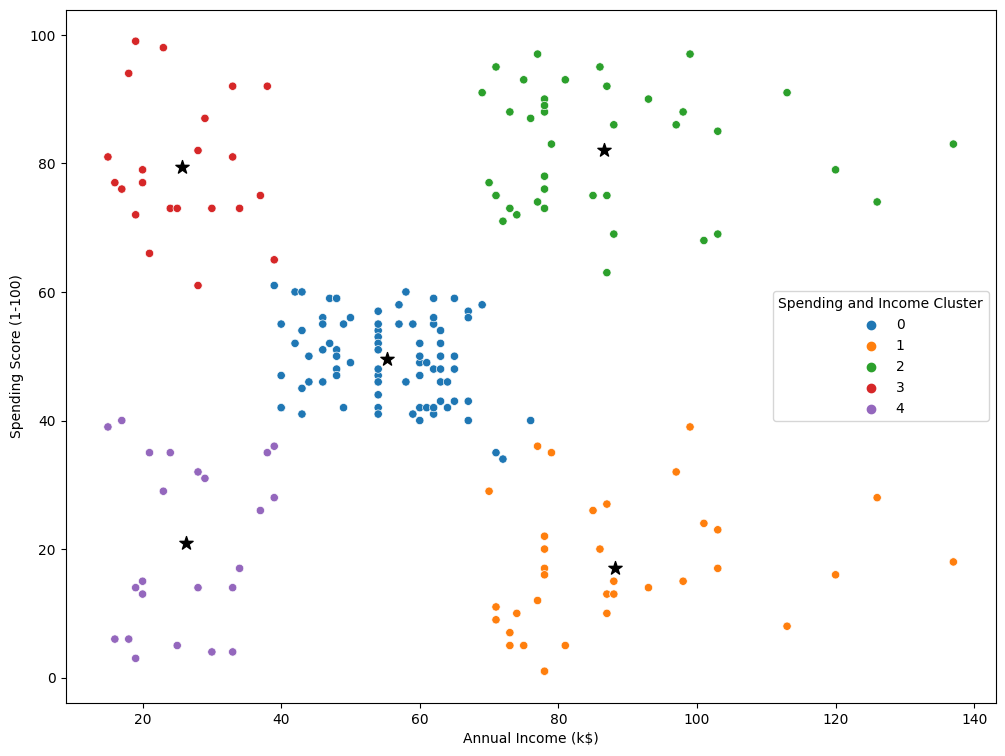

In [121]:
plt.figure(figsize = (12, 9))
plt.scatter(x=centers['x'], y = centers['y'], s=100,c='black',marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')
plt.savefig('clustering_bivariate.png')

In [97]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [99]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [100]:
#Multivariate clustering
from sklearn.preprocessing import StandardScaler

In [101]:
scale = StandardScaler()

In [102]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


In [109]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,4,True
1,21,15,81,0,3,True
2,20,16,6,0,4,False
3,23,16,77,0,3,False
4,31,17,40,0,4,False


In [110]:
dff.columns


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [111]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [112]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [113]:
dff = scale.fit_transform(dff)

In [114]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


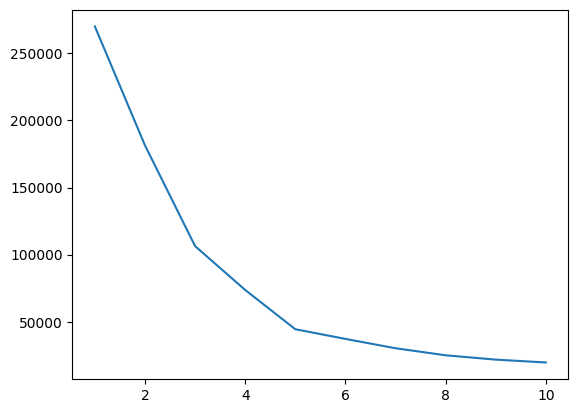

In [115]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [116]:
df.to_csv('Clustering.csv')

In [117]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,2
196,Female,45,126,28,2,1
197,Male,32,126,74,2,2
198,Male,32,137,18,2,1


In [118]:
df.to_csv('Clustering.csv')